In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
url = r"C:\Users\gonza\Downloads\Bank marketing campaigns dataset\bank-additional-full.csv"
data = pd.read_csv(url,sep=";")
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Tasks
* predicting the future results of marketing companies based on available statistics and, accordingly, formulating recommendations for such companies in the future.
* building a profile of a consumer of banking services (deposits).

In [5]:
# info sobre data y missing values
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
data["education"].unique()

array([&#39;basic.4y&#39;, &#39;high.school&#39;, &#39;basic.6y&#39;, &#39;basic.9y&#39;,
       &#39;professional.course&#39;, &#39;unknown&#39;, &#39;university.degree&#39;,
       &#39;illiterate&#39;], dtype=object)

In [8]:
# la columna de educacion podemos agrupar los tres de educacion basica
a = data["education"]
data["education"] = np.where(a =='basic.4y',"basic", a)
data["education"] = np.where(a =='basic.6y',"basic", a)
data["education"] = np.where(a =='basic.9y',"basic", a)

In [9]:
(data["job"]=="unknown").sum() / len(data)

0.008012042342429833

* Primero vamos a trabajar con un data sin unknows; primero remuevo la columna default(tiene un 20 por cierto de unknows); despues a los restantes les aplico la moda 
* despues haremos lo mismo pero manteniendo los unknows

In [10]:
columns = data.columns.values.tolist()
print("Porcentaje unknown por columnas")
print("-------------------------------")
for i in columns:
    suma = (data[i]=="unknown").sum() / len(data) * 100
    print(f"la columna {i} tiene {round(suma,2)} de unknowns")

Porcentaje unknown por columnas
-------------------------------
la columna age tiene 0.0 de unknowns
la columna job tiene 0.8 de unknowns
la columna marital tiene 0.19 de unknowns
la columna education tiene 4.2 de unknowns
la columna default tiene 20.87 de unknowns
la columna housing tiene 2.4 de unknowns
la columna loan tiene 2.4 de unknowns
la columna contact tiene 0.0 de unknowns
la columna month tiene 0.0 de unknowns
la columna day_of_week tiene 0.0 de unknowns
la columna duration tiene 0.0 de unknowns
la columna campaign tiene 0.0 de unknowns
la columna pdays tiene 0.0 de unknowns
la columna previous tiene 0.0 de unknowns
la columna poutcome tiene 0.0 de unknowns
la columna emp.var.rate tiene 0.0 de unknowns
la columna cons.price.idx tiene 0.0 de unknowns
la columna cons.conf.idx tiene 0.0 de unknowns
la columna euribor3m tiene 0.0 de unknowns
la columna nr.employed tiene 0.0 de unknowns
la columna y tiene 0.0 de unknowns


In [11]:
# vamos a trabajar primero removiendo todos los unknows de la columna "default"
data_unknow = data[(data["default"]!= "unknown")]

In [12]:
print("Porcentaje unknown por columnas")
print("-------------------------------")
for i in columns:
    suma = (data_unknow[i]=="unknown").sum() / len(data) * 100
    print(f"la columna {i} tiene {round(suma,2)} de unknowns")

Porcentaje unknown por columnas
-------------------------------
la columna age tiene 0.0 de unknowns
la columna job tiene 0.43 de unknowns
la columna marital tiene 0.17 de unknowns
la columna education tiene 2.87 de unknowns
la columna default tiene 0.0 de unknowns
la columna housing tiene 1.85 de unknowns
la columna loan tiene 1.85 de unknowns
la columna contact tiene 0.0 de unknowns
la columna month tiene 0.0 de unknowns
la columna day_of_week tiene 0.0 de unknowns
la columna duration tiene 0.0 de unknowns
la columna campaign tiene 0.0 de unknowns
la columna pdays tiene 0.0 de unknowns
la columna previous tiene 0.0 de unknowns
la columna poutcome tiene 0.0 de unknowns
la columna emp.var.rate tiene 0.0 de unknowns
la columna cons.price.idx tiene 0.0 de unknowns
la columna cons.conf.idx tiene 0.0 de unknowns
la columna euribor3m tiene 0.0 de unknowns
la columna nr.employed tiene 0.0 de unknowns
la columna y tiene 0.0 de unknowns


(array([0, 1, 2, 3, 4, 5]), &lt;a list of 6 Text major ticklabel objects&gt;)

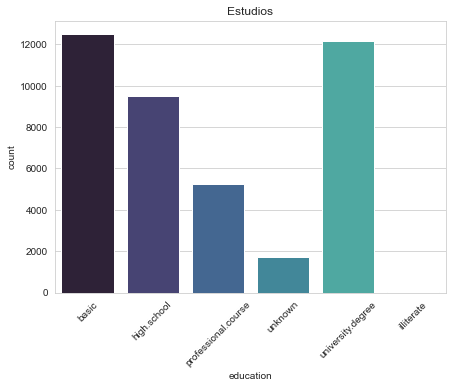

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x="education",data=data, palette="mako")
plt.title("Estudios")
plt.xticks(rotation=45)

In [14]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
# describe pero con categorical variables (vemos cuales son los valores mas frecuentes (top))
data.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,6,3,3,3,2,10,5,3,2
top,admin.,married,basic,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12513,32588,21576,33950,26144,13769,8623,35563,36548


In [16]:
# sustituyo los unknows por el valor mas frecuente en las variables categoricas (despues lo hare con las numericas)
categorical_top = data.describe(include=["object"])
categorical_top_col = categorical_top.columns.values.tolist()
for i in categorical_top_col:
    top = categorical_top.loc["top",i]
    data_unknow[i] = np.where(data_unknow[i]=="unknown",top,data_unknow[i])

In [17]:
print("Porcentaje unknown por columnas")
print("-------------------------------")
for i in columns:
    suma = (data_unknow[i]=="unknown").sum() / len(data) * 100
    print(f"la columna {i} tiene {round(suma,2)} de unknowns")

Porcentaje unknown por columnas
-------------------------------
la columna age tiene 0.0 de unknowns
la columna job tiene 0.0 de unknowns
la columna marital tiene 0.0 de unknowns
la columna education tiene 0.0 de unknowns
la columna default tiene 0.0 de unknowns
la columna housing tiene 0.0 de unknowns
la columna loan tiene 0.0 de unknowns
la columna contact tiene 0.0 de unknowns
la columna month tiene 0.0 de unknowns
la columna day_of_week tiene 0.0 de unknowns
la columna duration tiene 0.0 de unknowns
la columna campaign tiene 0.0 de unknowns
la columna pdays tiene 0.0 de unknowns
la columna previous tiene 0.0 de unknowns
la columna poutcome tiene 0.0 de unknowns
la columna emp.var.rate tiene 0.0 de unknowns
la columna cons.price.idx tiene 0.0 de unknowns
la columna cons.conf.idx tiene 0.0 de unknowns
la columna euribor3m tiene 0.0 de unknowns
la columna nr.employed tiene 0.0 de unknowns
la columna y tiene 0.0 de unknowns


### Feature enginering
* haremos dummys o onehotencoder
* quitaremos la columna duration que no aporta nada (segun kaglle)
* veremos outliers como afectan

In [18]:
### outliers: primero vemos describe y cuales variables pueden tener outliers; despues las graficamos (vemos que age y campaign pueden presentar)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* &amp; *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* &amp; *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


&lt;matplotlib.axes._subplots.AxesSubplot at 0x1eeb30c2688&gt;

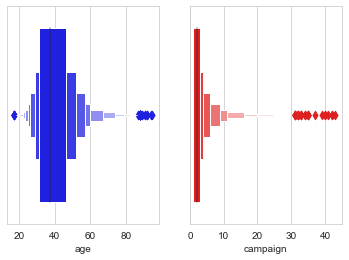

In [19]:
fig,ax = plt.subplots(1,2,figsize=(6,4))
sns.boxenplot(x="age",data=data_unknow,ax=ax[0],color="b")
sns.boxenplot(x="campaign",data=data_unknow,ax=ax[1],color="r")

In [20]:
data_unknow.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13,57,housemaid,divorced,basic,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# transformo y en 0 y 1
data_unknow["y"] = np.where(data_unknow["y"]=="yes",1,0)

In [22]:
## hacemos dummies de todas las cetogoricas
categorical = data_unknow.select_dtypes(include=["object"]).columns.values.tolist()

In [23]:
# ojo si seleccionamos columns no hace falta despues hacer join, conserva el antiguo dataframe
dummies = pd.get_dummies(data_unknow,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],drop_first=True)

In [24]:
dummies.columns

Index([&#39;age&#39;, &#39;duration&#39;, &#39;campaign&#39;, &#39;pdays&#39;, &#39;previous&#39;, &#39;emp.var.rate&#39;,
       &#39;cons.price.idx&#39;, &#39;cons.conf.idx&#39;, &#39;euribor3m&#39;, &#39;nr.employed&#39;, &#39;y&#39;,
       &#39;job_blue-collar&#39;, &#39;job_entrepreneur&#39;, &#39;job_housemaid&#39;,
       &#39;job_management&#39;, &#39;job_retired&#39;, &#39;job_self-employed&#39;, &#39;job_services&#39;,
       &#39;job_student&#39;, &#39;job_technician&#39;, &#39;job_unemployed&#39;, &#39;marital_married&#39;,
       &#39;marital_single&#39;, &#39;education_high.school&#39;, &#39;education_illiterate&#39;,
       &#39;education_professional.course&#39;, &#39;education_university.degree&#39;,
       &#39;default_yes&#39;, &#39;housing_yes&#39;, &#39;loan_yes&#39;, &#39;contact_telephone&#39;,
       &#39;month_aug&#39;, &#39;month_dec&#39;, &#39;month_jul&#39;, &#39;month_jun&#39;, &#39;month_mar&#39;,
       &#39;month_may&#39;, &#39;month_nov&#39;, &#39;mont

In [25]:
dummies.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [26]:
# para ver la relacion entre las variables y eviar multicolinealidad
dummies.corr().style.background_gradient(cmap='viridis')


&lt;pandas.io.formats.style.Styler at 0x1eeb29a3088&gt;

In [27]:
# vemos que hay muchas variables que tienen correlacion; vamos a usar sklearn para hacer una seleccion de variables
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [28]:
dummies_vars = dummies.columns.values.tolist()
Y = ["y"]
X = [v for v in dummies_vars if v not in Y]


In [29]:
# indicamos el modelo y la seleccion de features ( despues podremos hacerlo viendo otros features de logistic regresion)
n = 15
lm = LogisticRegression()
rfe = RFE(lm,n_features_to_select=n)
rfe.fit(dummies[X],dummies[Y])


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class=&#39;warn&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                                 random_state=None, solver=&#39;warn&#39;, tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [30]:
# ahora vemos con cuales se ha quedado
z=list(zip(dummies_vars,rfe.support_))
columns_final = []
for i in z:
    if i[1]==True:
        columns_final.append(i[0])
        print(i)


(&#39;previous&#39;, True)
(&#39;euribor3m&#39;, True)
(&#39;y&#39;, True)
(&#39;job_management&#39;, True)
(&#39;job_self-employed&#39;, True)
(&#39;job_services&#39;, True)
(&#39;loan_yes&#39;, True)
(&#39;month_dec&#39;, True)
(&#39;month_jul&#39;, True)
(&#39;month_jun&#39;, True)
(&#39;month_mar&#39;, True)
(&#39;month_nov&#39;, True)
(&#39;month_sep&#39;, True)
(&#39;day_of_week_wed&#39;, True)
(&#39;poutcome_nonexistent&#39;, True)


In [31]:
columns_final

[&#39;previous&#39;,
 &#39;euribor3m&#39;,
 &#39;y&#39;,
 &#39;job_management&#39;,
 &#39;job_self-employed&#39;,
 &#39;job_services&#39;,
 &#39;loan_yes&#39;,
 &#39;month_dec&#39;,
 &#39;month_jul&#39;,
 &#39;month_jun&#39;,
 &#39;month_mar&#39;,
 &#39;month_nov&#39;,
 &#39;month_sep&#39;,
 &#39;day_of_week_wed&#39;,
 &#39;poutcome_nonexistent&#39;]

In [43]:
# selecionamos las columnas que han sido elegidas
Y_final = dummies["y"]
X_final  = dummies[[v for v in columns_final if v != "y"]]

In [45]:
# usamos stamodel para ver datos y despues sklearn
import statsmodels.api as sm
logic_model = sm.Logit(Y_final,X_final) # recordar que con stat el orden es al reves Y y X

In [46]:
result = logic_model.fit()

Optimization terminated successfully.
         Current function value: 0.325051
         Iterations 7


In [47]:
result.summary()

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                32591
Model:                          Logit   Df Residuals:                    32577
Method:                           MLE   Df Model:                           13
Date:                Tue, 06 Oct 2020   Pseudo R-squ.:                  0.1536
Time:                        17:51:30   Log-Likelihood:                -10594.
converged:                       True   LL-Null:                       -12517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P&gt;|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.0844      0.025     -3.371      0.001      -0.133      -0.035
euribor3m               -0.6041      0.013    -46.865      0.000      -0.629      -0.579
job_management          -0.0990      0.069     -1.439      0.150      -0.234       0.036
job_self-employed       -0.1774      0.101     -1.753      0.080      -0.376       0.021
job_services            -0.4194      0.069     -6.083      0.000      -0.555      -0.284
loan_yes                -0.1329      0.050     -2.662      0.008      -0.231      -0.035
month_dec                0.8218      0.156      5.270      0.000       0.516       1.127
month_jul                0.9263      0.061     15.309      0.000       0.808       1.045
month_jun                0.6365      0.060     10.698      0.000       0.520       0.753
month_mar                1.2039      0.092     13.028      0.000       1.023       1.385
month_nov                0.3420      0.064      5.339      0.000       0.216       0.468
month_sep                0.6669      0.090      7.411      0.000       0.491       0.843
day_of_week_wed          0.0934      0.044      2.108      0.035       0.007       0.180
poutcome_nonexistent    -0.5692      0.039    -14.550      0.000      -0.646      -0.492
========================================================================================
&quot;&quot;&quot;

* Log-Likelihood: this is the maximized value of the log-likelihood function.
* LL-Null: this is the result of the maximized log-likelihood function when only an intercept is included. It forms the basis for the * pseudo-R^2 statistic and the Log-Likelihood Ratio (LRR) test (see below)
* pseudo-R^2: this is a substitute of the familiar R^2 available under least squares. It is computed based on the ratio of the maximized log-likelihood function for the null model m0 and the full model m1 as follows:
pseudo-R^2

The values vary from 0 (when the model does not improve the likelihood) to 1 (where the model fits perfectly and the log-likelihood is maximized at 0). Consquently, higher values indicate a better fit.

LLR: The LLR test generally compares a more restricted model and is computed as:
llr

The null hypothesis is that the restricted model performs better but a low p-value suggests that we can reject this hypothesis and prefer the full model over the null model. This is similar to the F-test for linear regression (where can also use the LLR test when we estimate the model using MLE).

* z-statistic: plays the same role as the t-statistic in the linear regression output and is equally computed as the ratio of the coefficient estimate and its standard error.

* p-values: these indicate the probability of observing the test statistic assuming the null hypothesis H0 that the population coefficient is zero.

In [48]:
# vemos que los coeficientes y sus pvalues estan bien( hay algunos que aportan mas como el mes) a pesar que r2 no es muy elevado

In [49]:
# ahora vamos con sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_final,Y_final, test_size=0.3, random_state=0)

logic_model_2 = linear_model.LogisticRegression() # no usamos ningun parametro
logic_model_2.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class=&#39;warn&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                   random_state=None, solver=&#39;warn&#39;, tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# para medir la eficacia de las prediciones podemos usar metrics de sklearn; compara nuestros valores reales y las predictiones; en esta caso con una eficacia muy alta
from sklearn import metrics
prediction = logic_model_2.predict(X_test)
metrics.accuracy_score(Y_test,prediction)

0.8754346492125179

In [52]:
# no esta mal pero podemos mejorarlo; vamos a usar un cross validation para ver la validez del modelo
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(),X_final,Y_final,scoring="accuracy",cv=10)

In [54]:
scores

array([0.87116564, 0.87116564, 0.87116564, 0.87116564, 0.87112611,
       0.87143295, 0.82786131, 0.88459177, 0.87968079, 0.42940454])

In [53]:
scores.mean()

0.8248760053551957

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[8438,   92],
       [1126,  122]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      8530
           1       0.57      0.10      0.17      1248

    accuracy                           0.88      9778
   macro avg       0.73      0.54      0.55      9778
weighted avg       0.84      0.88      0.83      9778



### vamos a usar otros metodos como max min scaler y label encoder para ver como trabaja el modelo

In [76]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train_max = scaler.transform(X_train)
X_test_max = scaler.transform(X_test)

In [77]:
logic_model_2.fit(X_train_max,Y_train)
prediction_max = logic_model_2.predict(X_test_max)
metrics.accuracy_score(Y_test,prediction_max)

0.8755369196154633

In [79]:
# vemos que no ha mejorado nada, en relacion con el anterior 

In [84]:
# vamos a hacer otra seleccion de modelo (RFE) pero con otros parametros 
lr_dos = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
rfe_dos = RFE(lr_dos,n_features_to_select=12)
rfe_dos.fit(dummies[X],dummies[Y])

RFE(estimator=LogisticRegression(C=1.0, class_weight=&#39;balanced&#39;, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=10000,
                                 multi_class=&#39;warn&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                                 random_state=None, solver=&#39;lbfgs&#39;, tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [85]:
z=list(zip(dummies_vars,rfe_dos.support_))
columns_final_dos = []
for i in z:
    if i[1]==True:
        columns_final_dos.append(i[0])
        print(i)

(&#39;previous&#39;, True)
(&#39;emp.var.rate&#39;, True)
(&#39;job_management&#39;, True)
(&#39;job_services&#39;, True)
(&#39;education_high.school&#39;, True)
(&#39;month_jun&#39;, True)
(&#39;month_mar&#39;, True)
(&#39;month_may&#39;, True)
(&#39;month_nov&#39;, True)
(&#39;month_oct&#39;, True)
(&#39;day_of_week_wed&#39;, True)
(&#39;poutcome_nonexistent&#39;, True)


In [86]:
Y_final_dos = dummies["y"]
X_final_dos  = dummies[[v for v in columns_final_dos if v != "y"]]

In [88]:

X_train, X_test, Y_train, Y_test = train_test_split(X_final_dos,Y_final_dos, test_size=0.3, random_state=0)

In [89]:
logic_model_3 = linear_model.LogisticRegression() # no usamos ningun parametro
logic_model_3.fit(X_train,Y_train)
prediction_3 = logic_model_3.predict(X_test)
metrics.accuracy_score(Y_test,prediction_3)

0.8704233994681939

In [95]:
prediction_3.shape

(9778,)

In [96]:
# vemos que tampoco hay mucha mejora y empeora un poco; vemos la curva auc
fpr, tpr, thresholds = metrics.roc_curve(Y_test,prediction_3)
metrics.auc(fpr, tpr)

0.54403350166832

### Segundo Intento

In [98]:
data_dos = data.copy()

In [100]:
data_dos.drop("duration",axis=1,inplace=True)

In [101]:
# eliminamos duration y tambien default que tiene muchos unknows
data_dos.drop("default",axis=1,inplace=True)

In [105]:
# vemos cuantos unknows hay
columns_dos = data_dos.columns.values.tolist()
print("Porcentaje unknown por columnas")
print("-------------------------------")
for i in columns_dos:
    suma = (data_dos[i]=="unknown").sum() / len(data_dos) * 100
    print(f"la columna {i} tiene {round(suma,2)} de unknowns")

Porcentaje unknown por columnas
-------------------------------
la columna age tiene 0.0 de unknowns
la columna job tiene 0.8 de unknowns
la columna marital tiene 0.19 de unknowns
la columna education tiene 4.2 de unknowns
la columna housing tiene 2.4 de unknowns
la columna loan tiene 2.4 de unknowns
la columna contact tiene 0.0 de unknowns
la columna month tiene 0.0 de unknowns
la columna day_of_week tiene 0.0 de unknowns
la columna campaign tiene 0.0 de unknowns
la columna pdays tiene 0.0 de unknowns
la columna previous tiene 0.0 de unknowns
la columna poutcome tiene 0.0 de unknowns
la columna emp.var.rate tiene 0.0 de unknowns
la columna cons.price.idx tiene 0.0 de unknowns
la columna cons.conf.idx tiene 0.0 de unknowns
la columna euribor3m tiene 0.0 de unknowns
la columna nr.employed tiene 0.0 de unknowns
la columna y tiene 0.0 de unknowns


In [107]:
# transformamos la columna Y en numerica
data_dos["y"] = (data_dos["y"]=="yes").astype("int")

In [116]:
# hacemos dummies
data_dumies = pd.get_dummies(data_dos,prefix="cat",drop_first=True)

In [122]:
## ahora separamos las columnas de la Y para hacer la seleccion de variables para el modelo
data_dumies_vars = data_dumies.columns.values.tolist()
Y = ["y"]
X = [v for v in data_dumies_vars if v not in Y]

In [124]:
# seleccion features
lr_dos = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
rfe_dos = RFE(lr_dos,n_features_to_select=12)
rfe_dos.fit(data_dumies[X],data_dumies[Y])

RFE(estimator=LogisticRegression(C=1.0, class_weight=&#39;balanced&#39;, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=10000,
                                 multi_class=&#39;warn&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                                 random_state=None, solver=&#39;lbfgs&#39;, tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [125]:
# seleccion de columnas despues de rfe
data_columns = data_dumies.columns.values.tolist()
z=list(zip(data_columns,rfe_dos.support_))
columns_final_tres = []
for i in z:
    if i[1]==True:
        columns_final_tres.append(i[0])

In [126]:
# selecionamos las columnas que han sido elegidas
Y = data_dumies["y"]
X = data_dumies[[v for v in columns_final_tres if v != "y"]]

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train_max = scaler.transform(X_train)
X_test_max = scaler.transform(X_test)

logic_model_3 = linear_model.LogisticRegression() # no usamos ningun parametro
logic_model_3.fit(X_train_max,Y_train)
prediction_3 = logic_model_3.predict(X_test_max)
metrics.accuracy_score(Y_test,prediction_3)

0.8973860969490977

In [135]:
# hay mejora aunque el area auc sigue igual
fpr, tpr, thresholds = metrics.roc_curve(Y_test,prediction_3)
auc = metrics.auc(fpr, tpr)
auc

0.5863343788087098

In [ ]:
# mucho mejor los resultados (accuracy) pero cuando las clases no estan balanceadas es mejor fijarse en precision, recall y f1

In [131]:
print(classification_report(Y_test,prediction_3))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10969
           1       0.65      0.19      0.29      1388

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [139]:
probs = logic_model_3.predict_proba(X_test)

prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold,1,0)
prob_df["actual"]= list(Y_test) # para que no tenga en cuenta su indice y crear confusion

Text(0.5, 1.0, &#39;curva Roc&#39;)

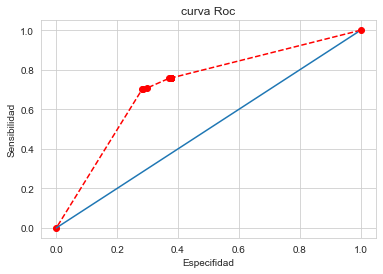

In [144]:
# vamos hacer lo mismo con diferentes threshold y graficarlos
thresholds = [0.04,0.05,0.07,0.10,0.12,0.15,0.18,0.20,0.25,0.3,0.35,0.40,0.45,0.50]
sensibilites = [1]# esto lo hacemos para que cuando grafiquemos la linea sea completa
especifities = [1]# esto lo hacemos para que cuando grafiquemos la linea sea completa

for t in thresholds:
    prob = probs[:,1]
    prob_df = pd.DataFrame(prob)    
    prob_df["prediction"] = np.where(prob_df[0]>=t,1,0)
    prob_df["actual"]= list(Y_test)

    confusion_matrix = pd.crosstab(prob_df["prediction"],prob_df["actual"])
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]

    sens = TP / (TP+FN)
    sensibilites.append(sens)
    espec_1 = 1-TN/(TN+FP)
    especifities.append(espec_1)
# esto lo hacemos para que cuando grafiquemos la linea sea completa
sensibilites.append(0)
especifities.append(0)

plt.plot(especifities,sensibilites, marker="o",linestyle="--",color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("Especifidad")
plt.ylabel("Sensibilidad")
plt.title("curva Roc")